# Supervised Machine Learning: Regression - Final Assignment 
# Concrete Compressive Strength Dataset 


The dataset for his project is [Concrete Compressive Strength](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength) dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) It is a popular dataset used in machine learning and statistical analysis. It contains information about various factors affecting the compressive strength of concret, such as the composition of concrete ingredients (cement, water, coarse aggregate, fine aggregate, etc.), age of concrete, and curing conditions. The target variable is typically the compressive strength of the concrete. 

Main objective of this project is to construct a model that accurately predicts the compressive strength of concrete based on the given features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Concrete_Data.xlsx')
data.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


## 1. Data Analysis


| Variable Name         | Role    | Type       | Units   |
|-----------------------|---------|------------|---------|
| Cement                | Feature | Continuous | kg/m^3  |
| Blast Furnace Slag    | Feature | Integer    | kg/m^3  |
| Fly Ash               | Feature | Continuous | kg/m^3  |
| Water                 | Feature | Continuous | kg/m^3  |
| Superplasticizer      | Feature | Continuous | kg/m^3  |
| Coarse Aggregate      | Feature | Continuous | kg/m^3  |
| Fine Aggregate        | Feature | Continuous | kg/m^3  |
| Age                   | Feature | Integer    | day     |
| Concrete compressive strength | Target | Continuous | MPa  |


- **Cement**: Quantity of cement in the mixture, measured in kg/m^3.
- **Blast Furnace Slag**: Quantity of blast furnace slag in the mixture, measured in kg/m^3.
- **Fly Ash**: Quantity of fly ash in the mixture, measured in kg/m^3.
- **Water**: Quantity of water in the mixture, measured in kg/m^3.
- **Superplasticizer**: Quantity of superplasticizer in the mixture, measured in kg/m^3.
- **Coarse Aggregate**: Quantity of coarse aggregate in the mixture, measured in kg/m^3.
- **Fine Aggregate**: Quantity of fine aggregate in the mixture, measured in kg/m^3.
- **Age**: Age of the concrete, measured in days.
- **Concrete Compressive Strength**: The target variable representing the compressive strength of concrete, measured in MPa (megapascals).
 days.


In [3]:
# num of rows x num of columns
print('Dataset Dimensions:',data.shape)
print("---------------------------------")
# types of each column
print(data.dtypes)

Dataset Dimensions: (1030, 9)
---------------------------------
Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object


In [4]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
data.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [6]:
data.duplicated().sum()

25

In [7]:
data = data.drop_duplicates()

### **Box Plot of Dataset**

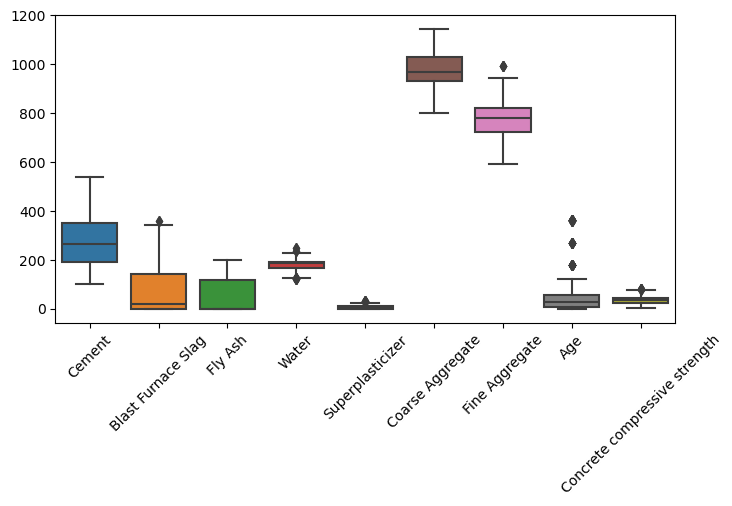

In [8]:
plt.subplots(figsize=(8, 4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Age, Blast Furnace Slag, Water, Superplasticcizer, Fine Aggregate has outliers and it is observed that Age has the most outiler.

Except Age and Concrete Compressive Strength, all other features have same units but have different scales. Thus we might need to scale 
the data so as to avoid bias in algorithmshms

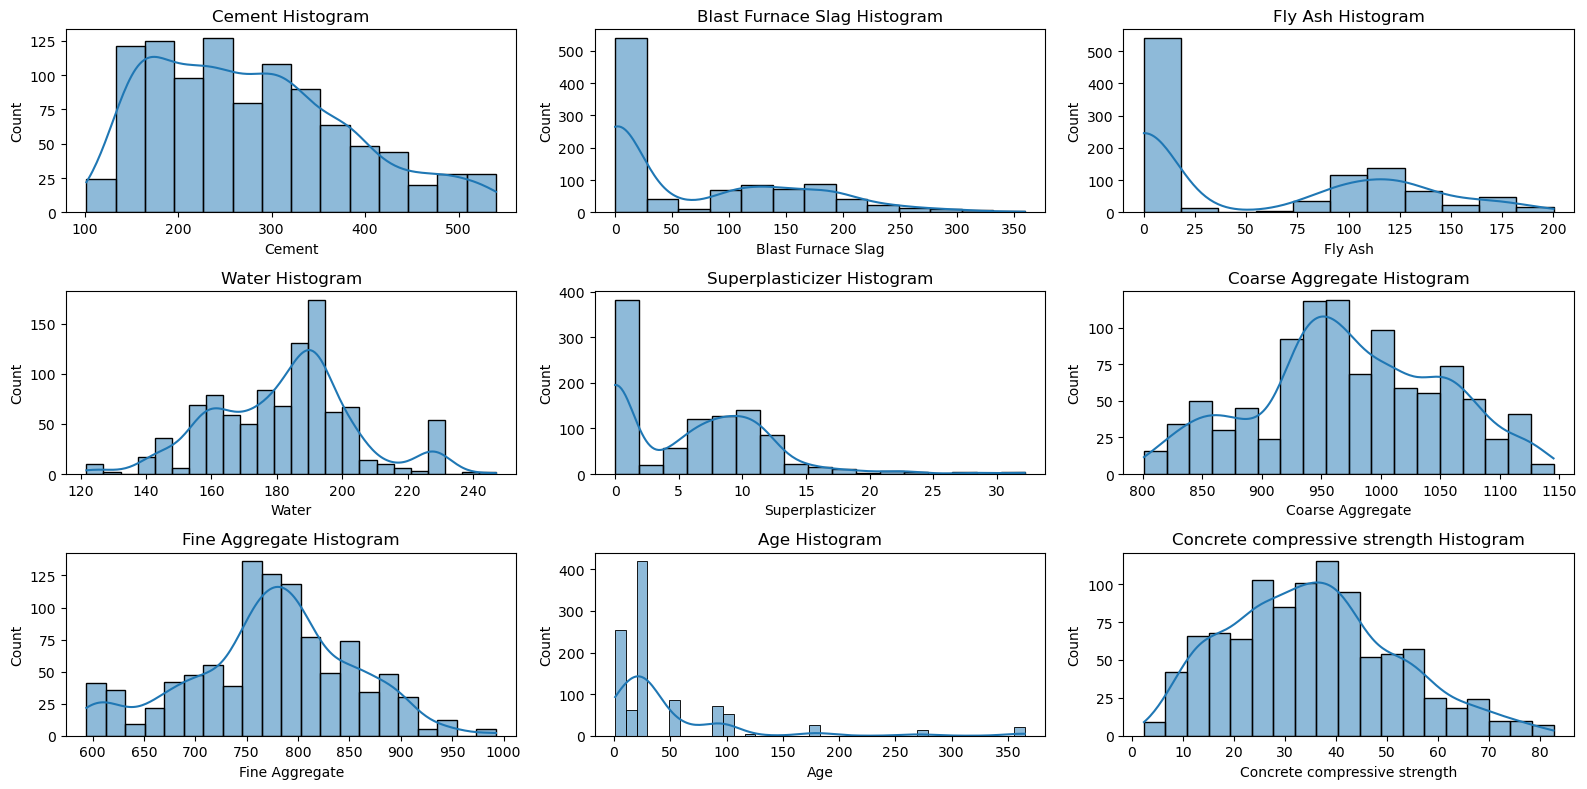

In [9]:
plt.figure(figsize=(16, 8))

for i, feature in enumerate(data.columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} Histogram")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

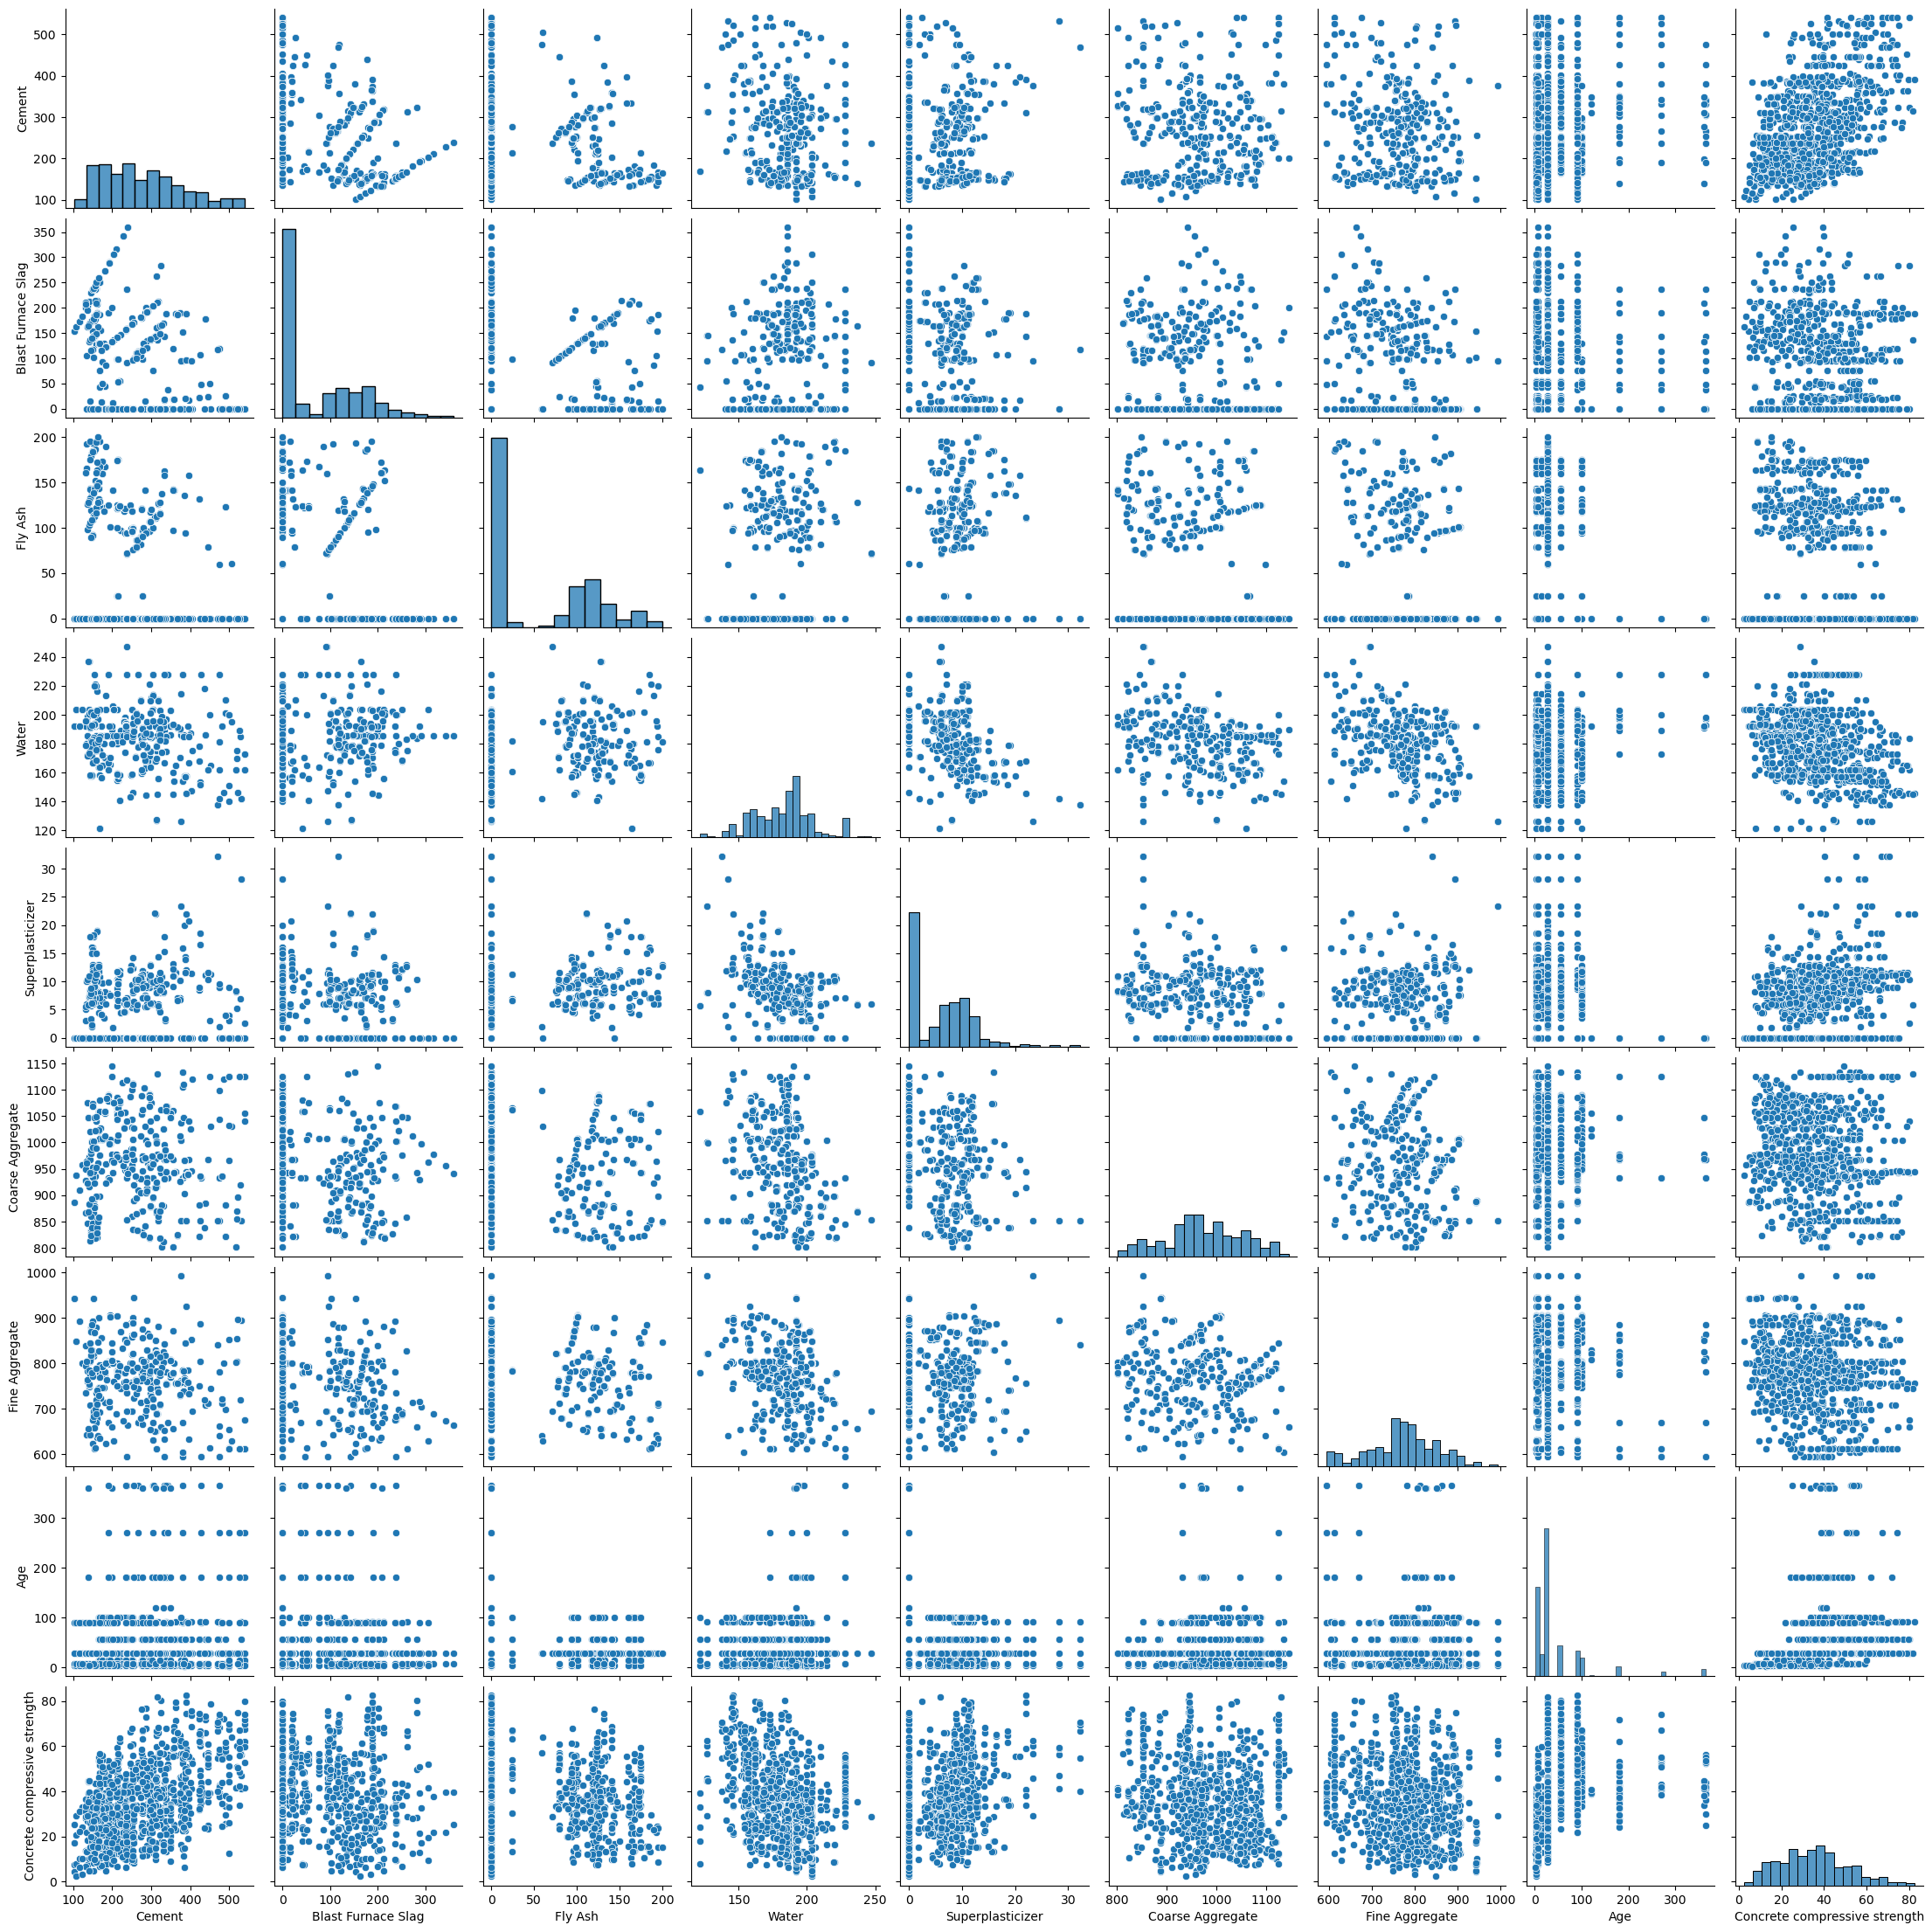

In [10]:
sns.pairplot(data)
plt.show()

- No high correlation between features

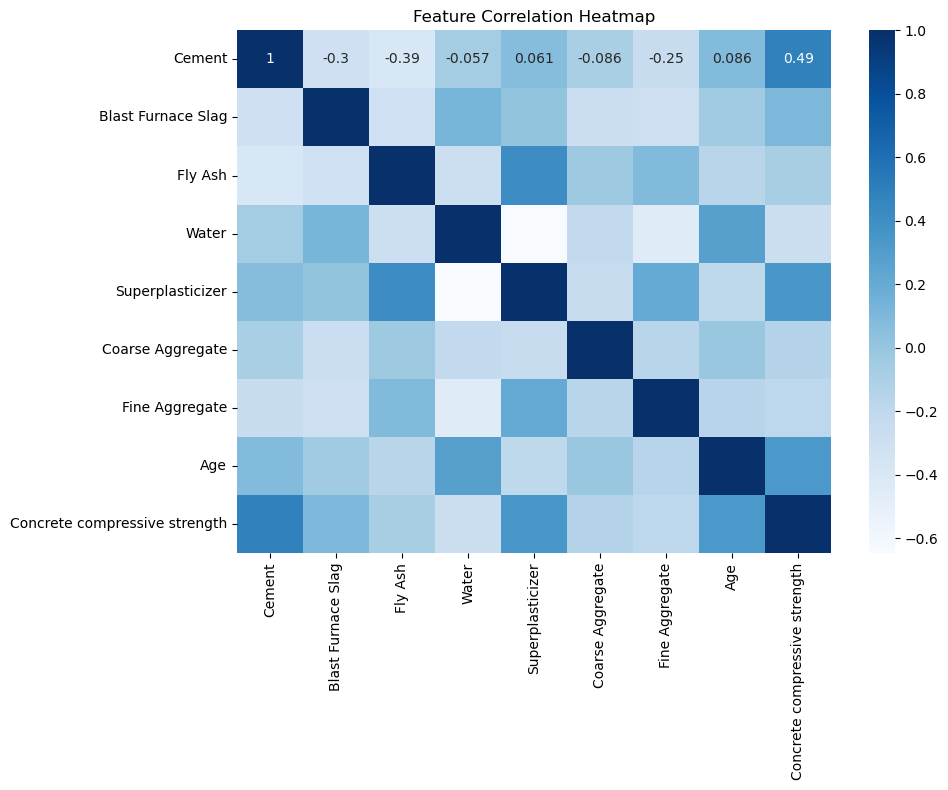

In [11]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='Blues',
            annot=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [12]:
corr

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,-0.303301,-0.385618,-0.056583,0.061296,-0.086212,-0.245379,0.086349,0.488283
Blast Furnace Slag,-0.303301,1.000000,-0.312342,0.130295,0.019902,-0.277558,-0.289676,-0.042759,0.103370
Fly Ash,-0.385618,-0.312342,1.000000,-0.283372,0.414055,-0.026485,0.090229,-0.158940,-0.080648
Water,-0.056583,0.130295,-0.283372,1.000000,-0.646875,-0.212495,-0.444888,0.279269,-0.269606
Superplasticizer,0.061296,0.019902,0.414055,-0.646875,1.000000,-0.242031,0.207794,-0.194094,0.344225
Coarse Aggregate,-0.086212,-0.277558,-0.026485,-0.212495,-0.242031,1.000000,-0.162212,-0.005263,-0.144710
Fine Aggregate,-0.245379,-0.289676,0.090229,-0.444888,0.207794,-0.162212,1.000000,-0.156572,-0.186457
Age,0.086349,-0.042759,-0.158940,0.279269,-0.194094,-0.005263,-0.156572,1.000000,0.337371
Concrete compressive strength,0.488283,0.103370,-0.080648,-0.269606,0.344225,-0.144710,-0.186457,0.337371,1.000000


- The highest positive correlation with the compressive strength of concrete is between cement with a value of 0.49. This means that the compressive strength of concrete can be expected to increase with the increase in the amount of cement.
- Also Super Plasticizer, Blast Furnace Slag and Age are in positive correlation to the Concrete compressive strength.
- Water, Coarse Aggregae and Fine Aggregate are in negative correlation to the Concrete compressive strength.

## 2. Data Preprocessing


In [13]:
# Separating Input Features and Target Variable.

X = data.drop("Concrete compressive strength", axis=1)
y = data["Concrete compressive strength"]

### Splitting Data Into Train and Test Sets


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3. Regression Models


In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

### Linear Regression

In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print("Linear Regression MSE:", linear_mse)

linear_cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
linear_cv_mse = -np.mean(linear_cv_scores)
print("Linear Regression Cross-Validation MSE:", linear_cv_mse)

Linear Regression MSE: 106.51455784480963
Linear Regression Cross-Validation MSE: 124.38306432846733


### Lasso Regression

In [18]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression MSE:", lasso_mse)

lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_cv_mse = -np.mean(lasso_cv_scores)
print("Lasso Regression Cross-Validation MSE:", lasso_cv_mse)

Lasso Regression MSE: 106.69320917779119
Lasso Regression Cross-Validation MSE: 124.23403600354804


### Ridge Regression

In [19]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression MSE:", ridge_mse)

ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_cv_mse = -np.mean(ridge_cv_scores)
print("Ridge Regression Cross-Validation MSE:", ridge_cv_mse)

Ridge Regression MSE: 106.51659947716797
Ridge Regression Cross-Validation MSE: 124.38292416212286


### Polynomial Model

In [20]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_predictions = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_predictions)
print("Polynomial Regression MSE:", poly_mse)

poly_cv_scores = cross_val_score(poly_model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
poly_cv_mse = -np.mean(poly_cv_scores)
print("Polynomial Regression Cross-Validation MSE:", poly_cv_mse)

Polynomial Regression MSE: 59.560040434325174
Polynomial Regression Cross-Validation MSE: 63.1571831226286


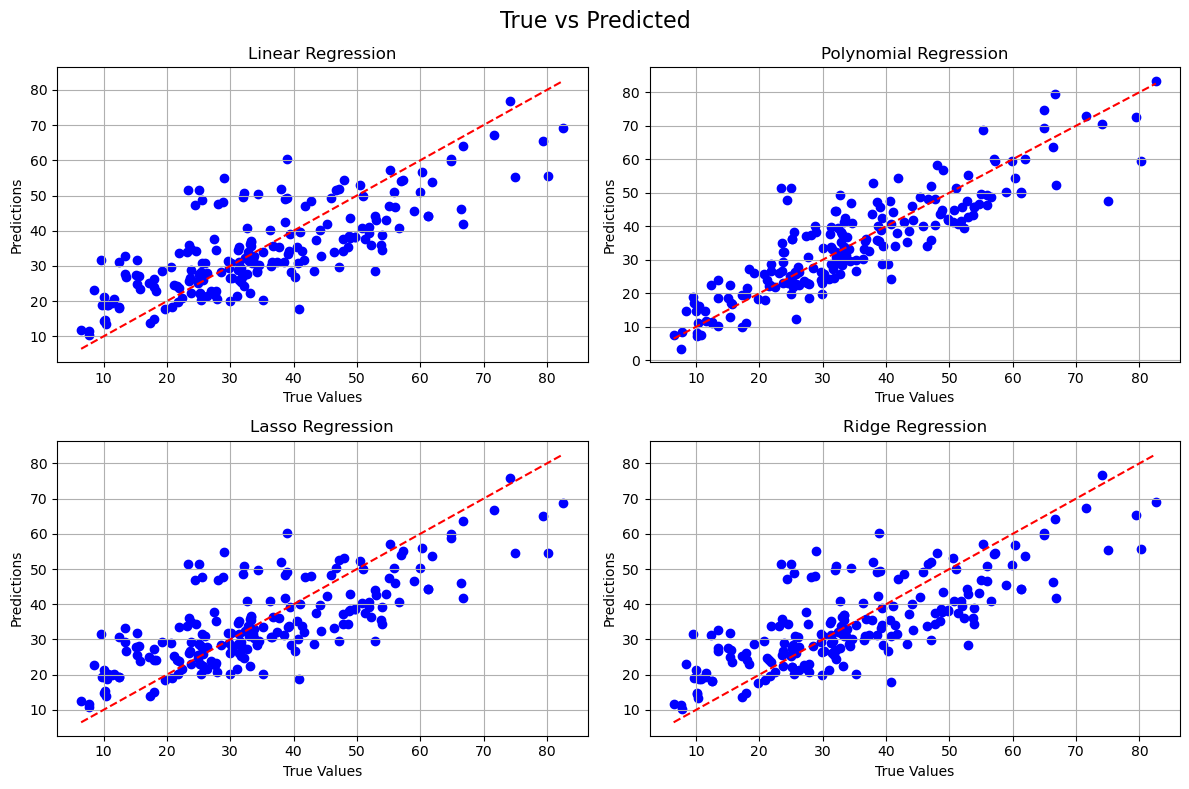

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Linear Regression
ax1.scatter(y_test, linear_predictions, color='blue', label='Predictions')
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
ax1.set_title('Linear Regression')
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predictions')
ax1.grid(True)

# Polynomial Regression
ax2.scatter(y_test, poly_predictions, color='blue', label='Predictions')
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
ax2.set_title('Polynomial Regression')
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predictions')
ax2.grid(True)

# Lasso Regression
ax3.scatter(y_test, lasso_predictions, color='blue', label='Predictions')
ax3.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
ax3.set_title('Lasso Regression')
ax3.set_xlabel('True Values')
ax3.set_ylabel('Predictions')
ax3.grid(True)

# Ridge Regresyon
ax4.scatter(y_test, ridge_predictions, color='blue', label='Predictions')
ax4.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
ax4.set_title('Ridge Regression')
ax4.set_xlabel('True Values')
ax4.set_ylabel('Predictions')
ax4.grid(True)

# Ana başlık
fig.suptitle('True vs Predicted', fontsize=16)

# Ayrıntıları düzenleme
plt.tight_layout()
plt.show()

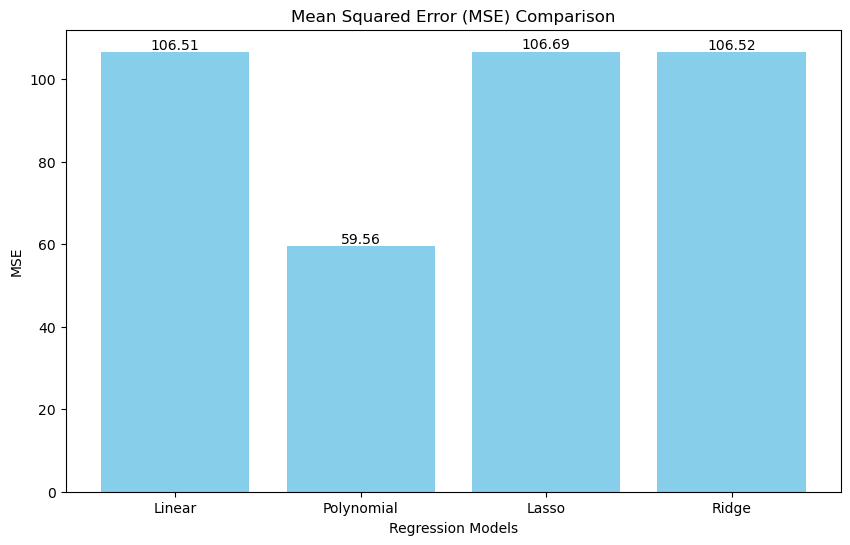

In [22]:
plt.figure(figsize=(10, 6))
models = ['Linear', 'Polynomial', 'Lasso', 'Ridge']
mse_values = [linear_mse, poly_mse, lasso_mse, ridge_mse]

bars = plt.bar(models, mse_values, color='skyblue')

for bar, mse in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(mse, 2), ha='center', va='bottom')

plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Regression Models')
plt.ylabel('MSE')
plt.show()

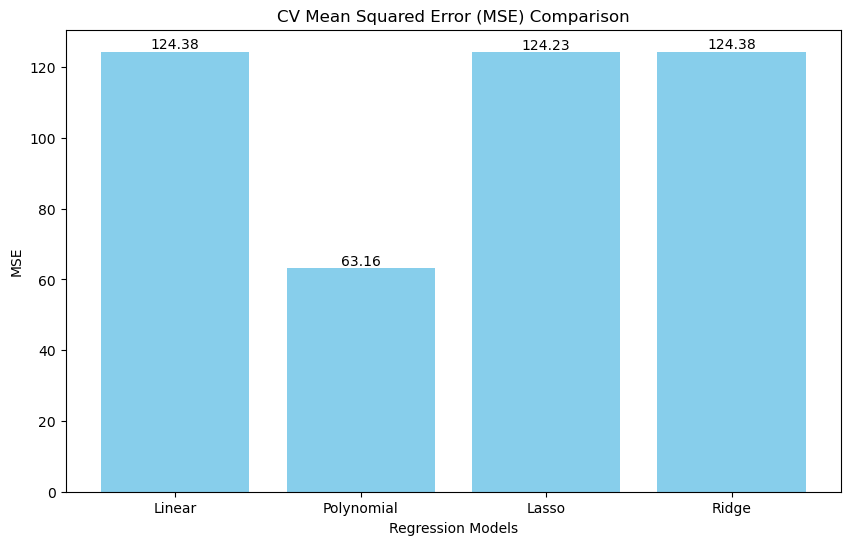

In [23]:
plt.figure(figsize=(10, 6))
models = ['Linear', 'Polynomial', 'Lasso', 'Ridge']
mse_values = [linear_cv_mse, poly_cv_mse, lasso_cv_mse, ridge_cv_mse]

bars = plt.bar(models, mse_values, color='skyblue')

for bar, mse in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(mse, 2), ha='center', va='bottom')

plt.title('CV Mean Squared Error (MSE) Comparison')
plt.xlabel('Regression Models')
plt.ylabel('MSE')
plt.show()

## 4. Overall Evaluations


Polynomial Regression significantly outperforms other methods with a notably lower MSE. This indicates that the complexity in your dataset cannot be adequately addressed by linear models alone, but polynomial regression fits better.

Linear, Lasso, and Ridge Regression models show similar MSE values.

Lasso and Ridge Regression show only slight differences in MSE compared to Linear Regression. This suggests that regularization of regression coefficients (as in Lasso and Ridge) may not significantly improve model performance.

In conclusion, Polynomial Regression performs better than other methods in your dataset, indicating a better fit to real-world data as indicated by cross-validation results. However, it's important to consider the risk of overfitting associated with polynomial regression.

## 5. Next Steps


- Adjusting the degree used in Polynomial Regression or tuning the alpha parameter in Lasso and Ridge regression can enhance the model.
- Using different machine learning algorithms such as Support Vector Regression (SVR), Decision Trees, Random Forests, or Gradient Boosting can potentially enhance model performance.